## 1. Implimentation of Linear Regression

Mean Absolute Error: 145.8724621358868
R-squared Score: -12.615640755991102


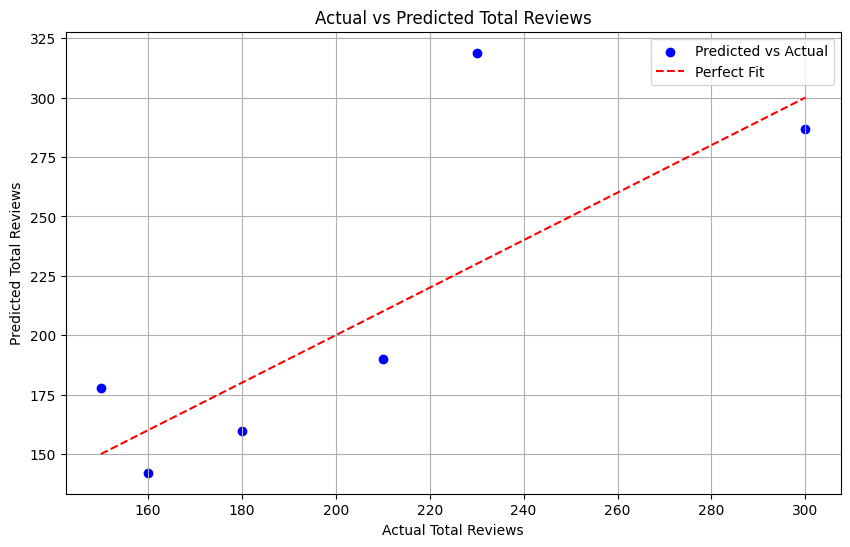

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Define the dataset
course_data = {
    'Course_Name': ['Python for Beginners', 'Advanced Machine Learning', 'Data Visualization', 
                    'Web Development', 'Mobile App Development', 'AI and Robotics'],
    'Week_1_Rating': [4.5, 4.7, 4.3, 4.6, 4.1, 4.8],
    'Week_2_Rating': [4.6, 4.8, 4.4, 4.5, 4.2, 4.9],
    'Week_3_Rating': [4.7, 4.6, 4.5, 4.7, 4.3, 4.8],
    'Total_Reviews': [150, 230, 180, 210, 160, 300]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(course_data)

# Define features and target variable
X = df.drop(['Total_Reviews','Course_Name'], axis=1)
y = df['Total_Reviews']



x_trian,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scalor = StandardScaler()
scaled_x_test =  scalor.fit_transform(x_test)
scaled_x_train =  scalor.fit_transform(x_trian)



model  = LinearRegression()

model.fit(scaled_x_train,y_train)
y_pred = model.predict(scaled_x_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R-squared Score:', r2)


scaled_x =  scalor.fit_transform(X)
df['Predicted_Reviews'] =  model.predict(scaled_x)
# Plotting the Actual vs Predicted Total Reviews
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Reviews'], df['Predicted_Reviews'], color='blue', label='Predicted vs Actual')
plt.plot([df['Total_Reviews'].min(), df['Total_Reviews'].max()], [df['Total_Reviews'].min(), df['Total_Reviews'].max()],
         color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Total Reviews')
plt.ylabel('Predicted Total Reviews')
plt.title('Actual vs Predicted Total Reviews')
plt.legend()
plt.grid(True)
plt.show()


## 2. Implimentation of Sample Classification

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00         1
        Pass       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Data with Actual and Predicted Performances:
  Student_Name  Study_Hours  Attendance_Rate  Assignment_Score  \
0        Alice           35               90                85   
1          Bob           15               60                50   
2      Charlie           40               95                90   
3        David            5               40                30   
4          Eva           25               80                75   
5        Frank           45               98                95   
6        Grace           10               50                45   
7       Hannah           20               

<Figure size 600x600 with 0 Axes>

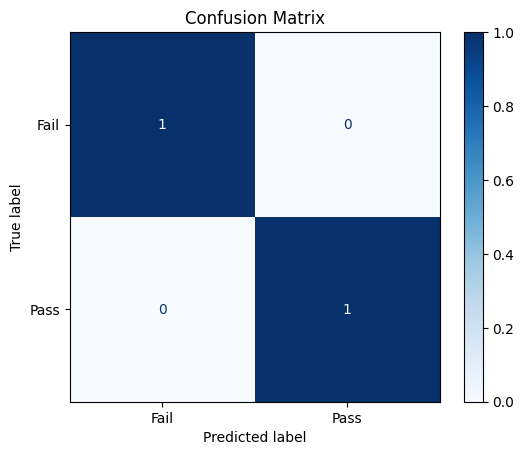

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Create the DataFrame from the student_data dictionary
student_data = {
    'Student_Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'Study_Hours': [35, 15, 40, 5, 25, 45, 10, 20, 30, 50],
    'Attendance_Rate': [90, 60, 95, 40, 80, 98, 50, 70, 85, 100],
    'Assignment_Score': [85, 50, 90, 30, 75, 95, 45, 65, 80, 100],
    'Final_Exam_Score': [88, 55, 93, 35, 78, 98, 50, 70, 82, 100],
    'Performance': ['Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass']
}

df = pd.DataFrame(student_data)

# Convert 'Performance' column to binary values: 1 for 'Pass' and 0 for 'Fail'
df['Performance_numerical'] = df['Performance'].apply(lambda x: 1 if x == 'Pass' else 0)

# Define feature variables (X) and target variable (y)
X = df[['Study_Hours', 'Attendance_Rate', 'Assignment_Score', 'Final_Exam_Score']]
y = df['Performance_numerical']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Transform the test data

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predictions from binary to "Pass" or "Fail"
y_pred_labels = ['Pass' if pred == 1 else 'Fail' for pred in y_pred]

# Convert actual labels from binary to "Pass" or "Fail"
y_test_labels = ['Pass' if label == 1 else 'Fail' for label in y_test]

# Evaluation: Print confusion matrix and classification report
print("Confusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=['Fail', 'Pass'])
print(cm)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, labels=['Fail', 'Pass']))

# Add predictions to the DataFrame for demonstration
X_scaled = scaler.transform(X)  # Scale the original features for demonstration
df['Predicted_Performance'] = ['Pass' if pred == 1 else 'Fail' for pred in model.predict(X_scaled)]

print("\nData with Actual and Predicted Performances:")
print(df)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


## 3.  Implimentation of Clustering Algorithm


Data with Cluster Assignments:
   Fruit_Type  Weight  Sugar_Content  Cluster
0       Apple     150             10        2
1      Banana     120             12        2
2      Orange     130              9        2
3       Mango     200             14        0
4      Grapes      50              8        1
5       Peach     150             11        2
6   Pineapple     250             15        0
7  Strawberry      20              7        1
8   Blueberry       5              6        1
9  Watermelon     100              9        2


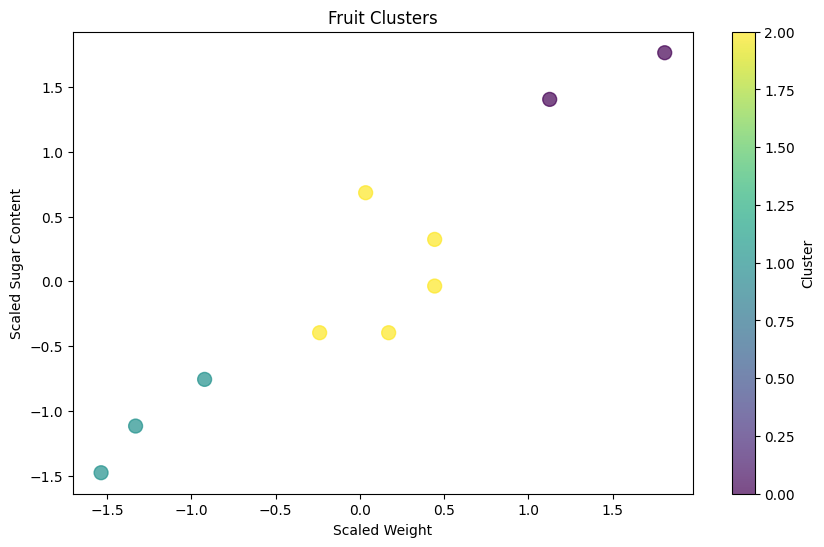

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a DataFrame from a new dictionary dataset
fruit_data = {
    'Fruit_Type': ['Apple', 'Banana', 'Orange', 'Mango', 'Grapes', 'Peach', 'Pineapple', 'Strawberry', 'Blueberry', 'Watermelon'],
    'Weight': [150, 120, 130, 200, 50, 150, 250, 20, 5, 100],  # Weight in grams
    'Sugar_Content': [10, 12, 9, 14, 8, 11, 15, 7, 6, 9]  # Sugar content in grams
}
df = pd.DataFrame(fruit_data)

# Define feature variables
X = df[['Weight', 'Sugar_Content']]

# Feature scaling (Standardizing the data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict the cluster for each data point
df['Cluster'] = kmeans.predict(X_scaled)

# Display the DataFrame with cluster assignments
print("\nData with Cluster Assignments:")
print(df)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Fruit Clusters')
plt.xlabel('Scaled Weight')
plt.ylabel('Scaled Sugar Content')
plt.colorbar(label='Cluster')
plt.show()